Name: Jishnu Chander Ravichanderan <br>
Github Username: jishnuchander <br>
USC ID: 1144843551 <br>

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import floor as fl
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'..\data\vertebral_column_data\column_2C.dat', header=None, sep=' ')
df.columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
              'degree_spondylolisthesis', 'labels']

In [3]:
df['labels'].value_counts()

AB    210
NO    100
Name: labels, dtype: int64

In [4]:
df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
labels                      0
dtype: int64

In [5]:
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [6]:
df.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,labels
104,77.41,29.40,63.23,48.01,118.45,93.56,AB
22,63.07,24.41,54.00,38.66,106.42,15.78,AB
169,44.25,1.10,38.00,43.15,98.27,23.91,AB
285,67.80,16.55,43.26,51.25,119.69,4.87,NO
199,75.30,16.67,61.30,58.63,118.88,31.58,AB


In [7]:
# assigning colors to the class labels for plotting scatter and box plots
labels = df['labels'].tolist()
colors = []
for i in labels:
    if i == 'AB':
        colors.append('red')
    else:
        colors.append('blue')

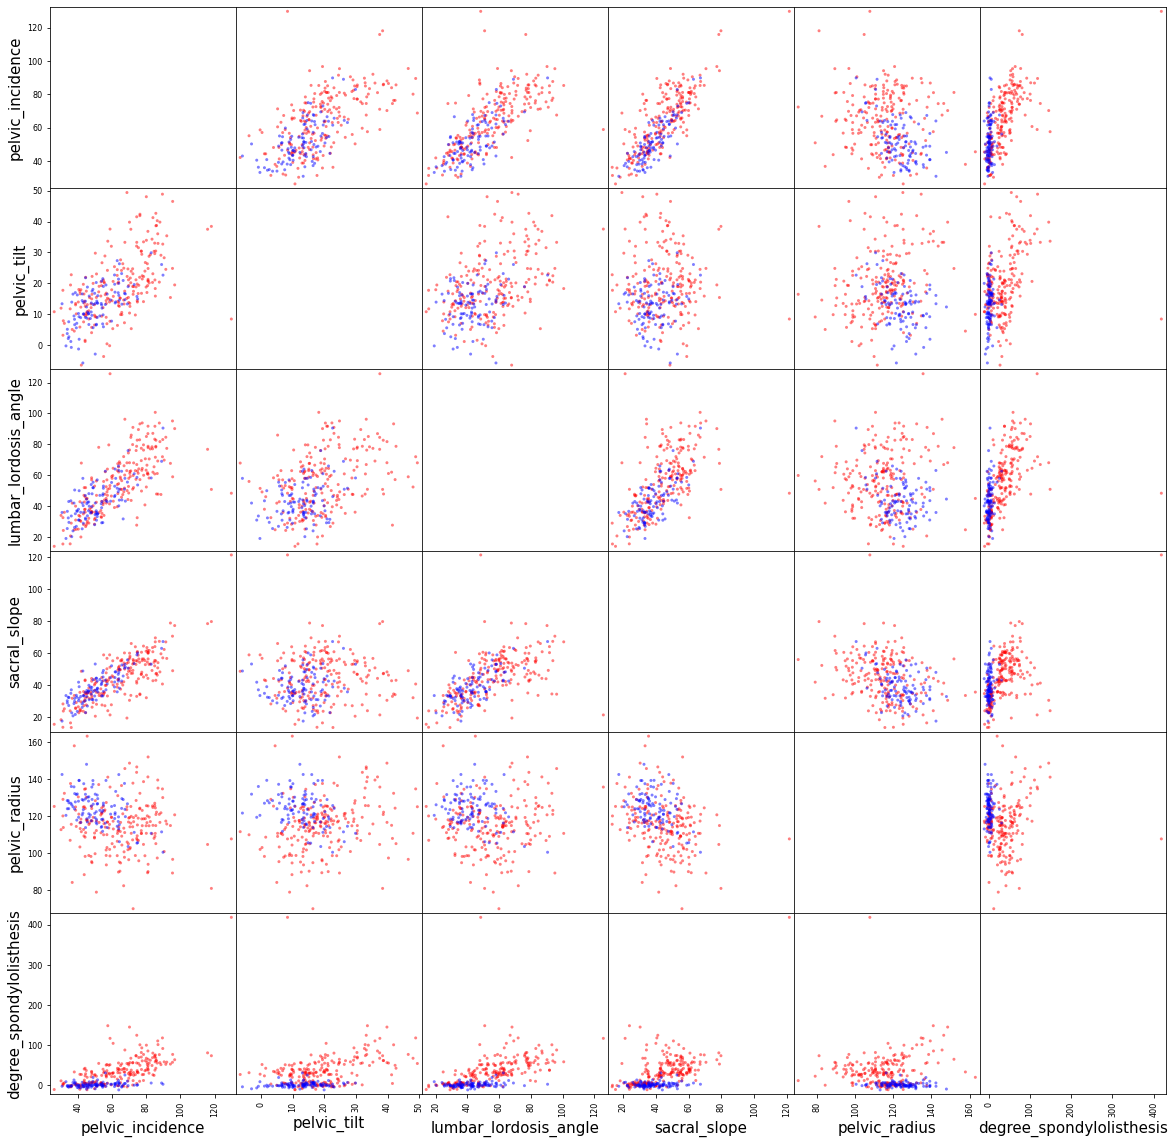

In [8]:
# plotting scatter plots of the independent variables

scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(20, 20), color=colors, diagonal=None)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15, rotation = 90)
plt.show()

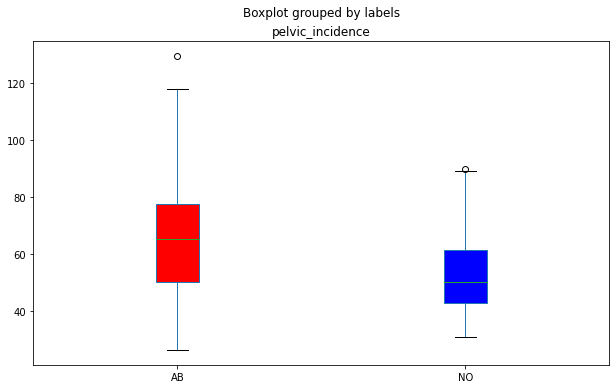

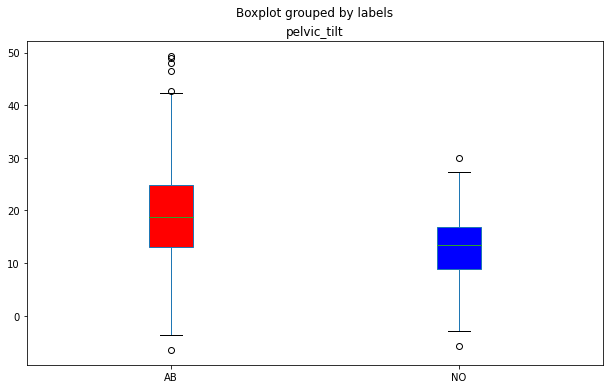

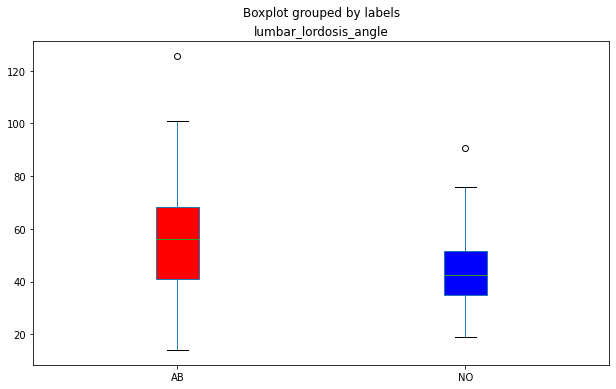

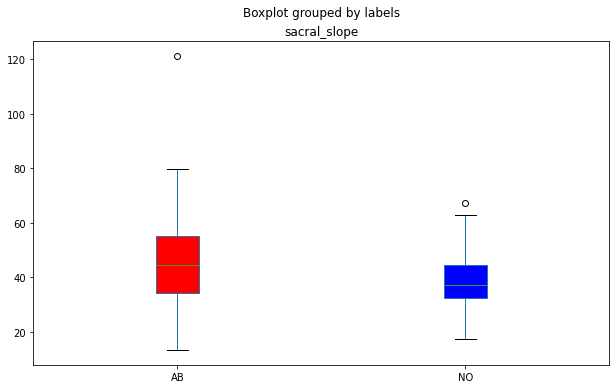

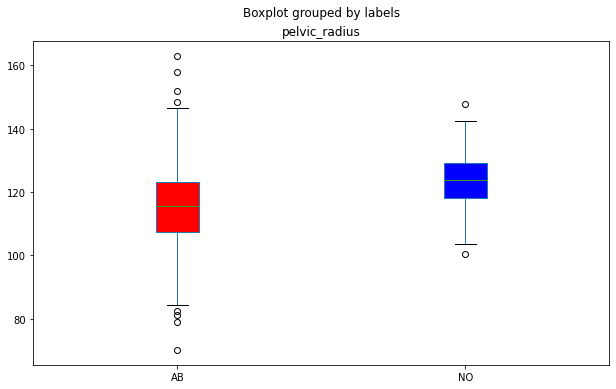

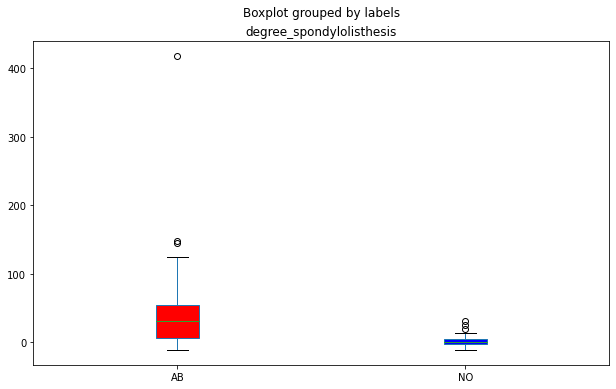

In [9]:
# plotting boxplots of the independent variables grouped by labels

for i in ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
          'degree_spondylolisthesis']:
    bp_dict = df.boxplot(column=i, by='labels', figsize=(10, 6), return_type='both', patch_artist=True, grid=False)
    colors = ['r', 'b']
    for row_key, (ax,row) in bp_dict.iteritems():
        ax.set_xlabel('')
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(colors[i])
    plt.show()

In [10]:
# assign class numbers as 1 or 0

def class_assign(row):
    if row['labels'] == 'NO':
        return 0
    else:
        return 1

In [11]:
df['class'] = df.apply(class_assign, axis=1)

In [12]:
# split the dataset into training and test data

df_train = pd.concat([df[0:140], df[210:280]], axis=0)
df_test = pd.concat([df[140:210], df[280:]], axis=0)

In [13]:
X_train = np.array(df_train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
                           'degree_spondylolisthesis']])
y_train = np.array(df_train[['class']])
X_test = np.array(df_test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
                           'degree_spondylolisthesis']])
y_test = np.array(df_test[['class']])

In [14]:
# Running K-nearest neighbors on entire dataset with majority polling

k_range = list(reversed(range(1, 211, 3)))
scores = {}
scores_list = []
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

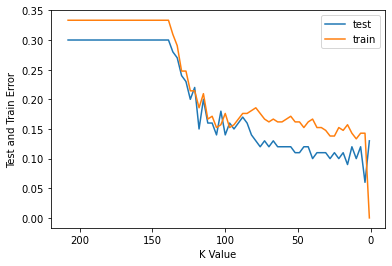

In [15]:
plt.plot(list(k_range), mse_test, label='test')
plt.plot(list(k_range), mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### k* optimal value is at k = 4, error = 0.06

In [16]:
# We calculate the confusion matrix, true positive rate, true negative rate, precision and F1-score

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)

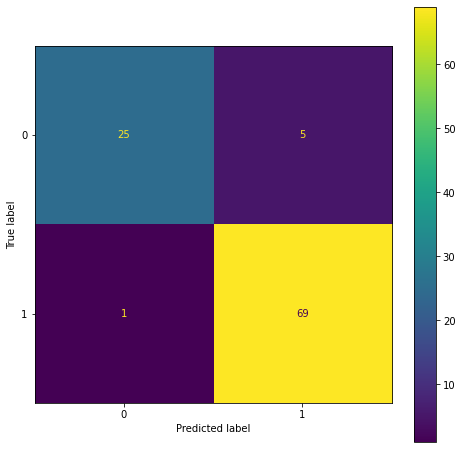

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(knn, X_test, y_test, ax=ax) 
plt.show()

In [18]:
cm=confusion_matrix(y_test, y_pred)

FP = cm[0][1]  
FN = cm[1][0]
TP = cm[1][1]
TN = cm[0][0]

In [19]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2*Precision*Recall/(Precision+Recall)

In [20]:
print('True positive rate, True Negative Rate, Precision, and F1-score: ')
print(TPR, TNR, Precision, F1)

True positive rate, True Negative Rate, Precision, and F1-score: 
0.9857142857142858 0.8333333333333334 0.9324324324324325 0.9583333333333333


In [21]:
# Running K-nearest neighbors on a subset of the dataset

best_error_rate = []

for N in range(10, 220, 10):
    class_0 = 210 + fl(N/3)
    class_1 = N - fl(N/3)
    df_train = pd.concat([df[0:class_1], df[210:class_0]], axis=0)
    X_train = np.array(df_train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
                           'degree_spondylolisthesis']])
    y_train = np.array(df_train[['class']])
    min_error = float('inf')
    
    for k in range(1, N, 5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train.ravel())
        y_pred = knn.predict(X_test)
        error = mean_squared_error(y_test, y_pred)
        min_error = min(error, min_error)
    best_error_rate.append(min_error)

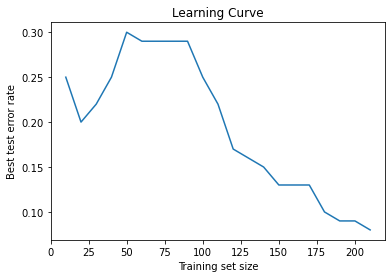

In [22]:
plt.plot(list(range(10, 220, 10)), best_error_rate)
plt.title('Learning Curve')
plt.xlabel('Training set size')
plt.ylabel('Best test error rate')
plt.show()

In [23]:
# lowest test error rate occurs when training set size is maximum, i.e, N = 210

In [24]:
X_train = np.array(df_train[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
                           'degree_spondylolisthesis']])
y_train = np.array(df_train[['class']])
X_test = np.array(df_test[['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 
                           'degree_spondylolisthesis']])
y_test = np.array(df_test[['class']])

In [25]:
# Running K-nearest neighbors on entire dataset with majority polling and Manhattan distance

k_range = list(reversed(range(1, 197, 5)))
scores = {}
scores_list = []
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

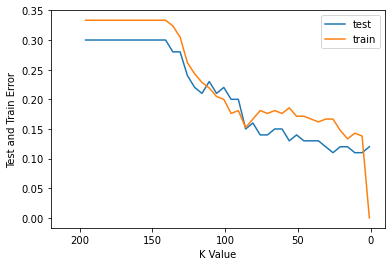

In [26]:
plt.plot(list(k_range), mse_test, label='test')
plt.plot(list(k_range), mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### k* optimal value for Manhattan (p=1) is 6, test error is 0.11

In [27]:
# Running K-nearest neighbors on entire dataset with majority polling and varying p-value

log_p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mse_test = []
mse_train = []

for i in log_p:
    p = pow(10, i)
    knn = KNeighborsClassifier(n_neighbors=6, p=p)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

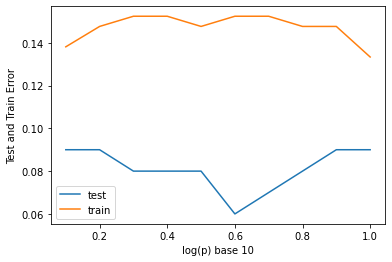

In [28]:
plt.plot(log_p, mse_test, label='test')
plt.plot(log_p, mse_train, label='train')
plt.xlabel('log(p) base 10')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### Best test error is for log(p) = 0.6 with test error = 0.06

In [29]:
# Running K-nearest neighbors on entire dataset with majority polling and Chebyshev distance

k_range = list(reversed(range(1, 197, 5)))
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

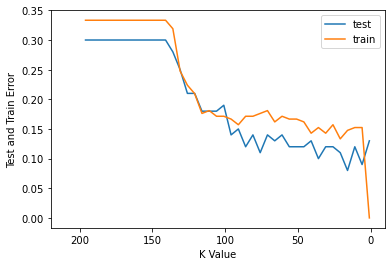

In [30]:
plt.plot(k_range, mse_test, label='test')
plt.plot(k_range, mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### k* optimal value for Chebyshev is 16, test error is 0.08

In [31]:
# Running K-nearest neighbors on entire dataset with majority polling and Mahalanobis distance

k_range = list(reversed(range(1, 197, 5)))
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.cov(X_train, rowvar=False)})
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

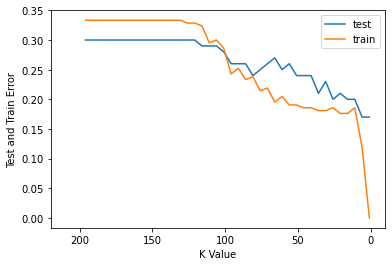

In [32]:
plt.plot(k_range, mse_test, label='test')
plt.plot(k_range, mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### k* optimal value for Mahalanobis is 6, test error is 0.17

## Results

| Methodology | Value | Test Error |
| --- | --- | --- |
| Manhattan | k=6 | 0.11 |
| log(p) | log(p)=0.6 | 0.06 |
| Chebyshev | k=16 | 0.08 |
| Mahalanobis | k=6 | 0.17 |

In [33]:
# Running K-nearest neighbors on entire dataset with weighted decision and Euclidean distance

k_range = list(reversed(range(1, 197, 5)))
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

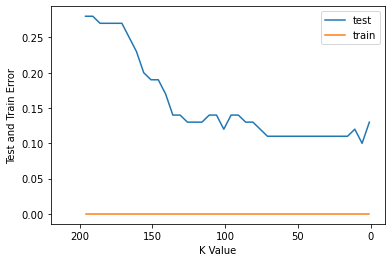

In [34]:
plt.plot(k_range, mse_test, label='test')
plt.plot(k_range, mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### Best test error for Euclidean metric in weighted knn is for k = 6 with test error = 0.1

In [35]:
# Running K-nearest neighbors on entire dataset with weighted decision and Manhattan distance

k_range = list(reversed(range(1, 197, 5)))
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

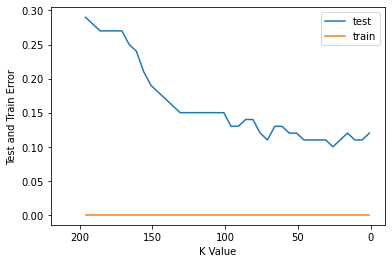

In [36]:
plt.plot(k_range, mse_test, label='test')
plt.plot(k_range, mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### Best test error for Manhattan metric in weighted knn is for k = 26 with test error = 0.1

In [37]:
# Running K-nearest neighbors on entire dataset with weighted decision and Chebyshev distance

k_range = list(reversed(range(1, 197, 5)))
mse_test = []
mse_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='chebyshev')
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))

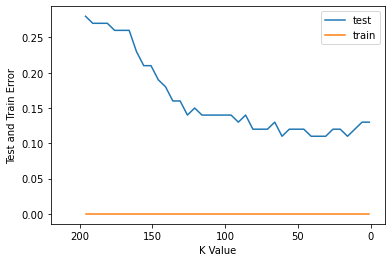

In [38]:
plt.plot(k_range, mse_test, label='test')
plt.plot(k_range, mse_train, label='train')
plt.xlim(220, -10)
plt.xlabel('K Value')
plt.ylabel('Test and Train Error')
plt.legend()
plt.show()

### Best test error for Chebyshev metric in weighted knn is for k = 16 with test error = 0.1

#### 1.(f) Lowest training error rate achieved was 0 while training knn using weighted decision. This is because when running predict method on the training data, the closest point to the training sample is the point itself which has 0 distance and thus infinite weight, making the training error rate zero. 